# Mean reversion strategy based on Lockheed Martin Corporation

We shall apply the concept of simple moving average
Ticker symbol is LMT, the data was gotten from yfinance library from Yahoo finance, with the time of interest being from 2020-01-01 to 2024-01-29.
The selcted date was to try capture the effect of Coivd 19, Russia invasion of Ukraine, Palestine conflict and  the ongoing conflict in Yemen

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import yfinance as yf
data=yf.download('LMT', start= '2020-01-01', end ='2024-01-29')



[*********************100%%**********************]  1 of 1 completed


In [3]:
print(data.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02  392.859985  399.369995  390.950012  399.369995  358.539948   
2020-01-03  404.019989  417.170013  403.000000  413.739990  371.440765   
2020-01-06  417.989990  417.989990  407.690002  413.109985  370.875183   
2020-01-07  411.250000  416.119995  408.290009  414.500000  372.123077   
2020-01-08  417.059998  418.179993  409.720001  411.029999  369.007843   

             Volume  
Date                 
2020-01-02  1258400  
2020-01-03  2990100  
2020-01-06  2477800  
2020-01-07  1059900  
2020-01-08  1708100  


In [5]:
df=data.to_csv('LMT.csv')

In [9]:
df=pd.read_csv("LMT.csv")
#Setting the date as an index
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
#Remove the Date column
df.drop(["Date"],inplace= True, axis=1)
df

,Open,High,Low,Close,Adj Close,Volume
2020-01-02,392.859985,399.369995,390.950012,399.369995,358.539948,1258400
2020-01-03,404.019989,417.170013,403.000000,413.739990,371.440765,2990100
2020-01-06,417.989990,417.989990,407.690002,413.109985,370.875183,2477800
2020-01-07,411.250000,416.119995,408.290009,414.500000,372.123077,1059900
2020-01-08,417.059998,418.179993,409.720001,411.029999,369.007843,1708100
...,...,...,...,...,...,...
2024-01-22,457.589996,460.829987,455.440002,458.760010,458.760010,1216800
2024-01-23,458.589996,459.000000,433.890015,439.670013,439.670013,3613500
2024-01-24,439.519989,443.200012,431.549988,431.649994,431.649994,1768900
2024-01-25,430.000000,433.940002,425.750000,431.040009,431.040009,1813900


#### We are setting up a function that will calculate the Simple moving average In this case the column is the close price

Setting the moving average to 21 days and the simple returns to a percentage change of the closing price also  setting up the log returns.We create a column for ratios to indicate how far we are from the mean.

In [10]:
def SMA (data, period=30, column='Close'):
    return data[column].rolling(window=period).mean()

In [12]:
# we are buidling and showing the data set
df['SMA'] = SMA(df,21)
df['Simple_Returns']=df.pct_change(1)['Close'] 
df['Log_Returns']=np.log(1+df['Simple_Returns'])
df['Ratios']=df['Close']/df['SMA']
df


,Open,High,Low,Close,Adj Close,Volume,SMA,Simple_Returns,Log_Returns,Ratios
2020-01-02,392.859985,399.369995,390.950012,399.369995,358.539948,1258400,NaN,NaN,NaN,NaN
2020-01-03,404.019989,417.170013,403.000000,413.739990,371.440765,2990100,NaN,0.035982,0.035349,NaN
2020-01-06,417.989990,417.989990,407.690002,413.109985,370.875183,2477800,NaN,-0.001523,-0.001524,NaN
2020-01-07,411.250000,416.119995,408.290009,414.500000,372.123077,1059900,NaN,0.003365,0.003359,NaN
2020-01-08,417.059998,418.179993,409.720001,411.029999,369.007843,1708100,NaN,-0.008372,-0.008407,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-01-22,457.589996,460.829987,455.440002,458.760010,458.760010,1216800,454.717619,0.002185,0.002182,1.008890
2024-01-23,458.589996,459.000000,433.890015,439.670013,439.670013,3613500,454.578096,-0.041612,-0.042503,0.967205
2024-01-24,439.519989,443.200012,431.549988,431.649994,431.649994,1768900,453.798572,-0.018241,-0.018409,0.951193
2024-01-25,430.000000,433.940002,425.750000,431.040009,431.040009,1813900,452.980477,-0.001413,-0.001414,0.951564


In [13]:
#getting the statitsics on the Ratios column
df['Ratios'].describe()

count    1004.000000
mean        1.000874
std         0.040900
min         0.749405
25%         0.979687
50%         1.000342
75%         1.020215
max         1.158254
Name: Ratios, dtype: float64

In [14]:
# Get and show the percentile values of the given ratios
percentiles=[15,20,50,80,85]
# Remove any NA values on ratio columns
#Store the results of the new ratios with no NA values
ratios=df['Ratios'].dropna()
#Get the values of the percentiles
percentile_values=np.percentile(ratios,percentiles)
#Display the values of the percentiles
percentile_values

array([0.96758218, 0.97425668, 1.00034175, 1.02783642, 1.03623024])

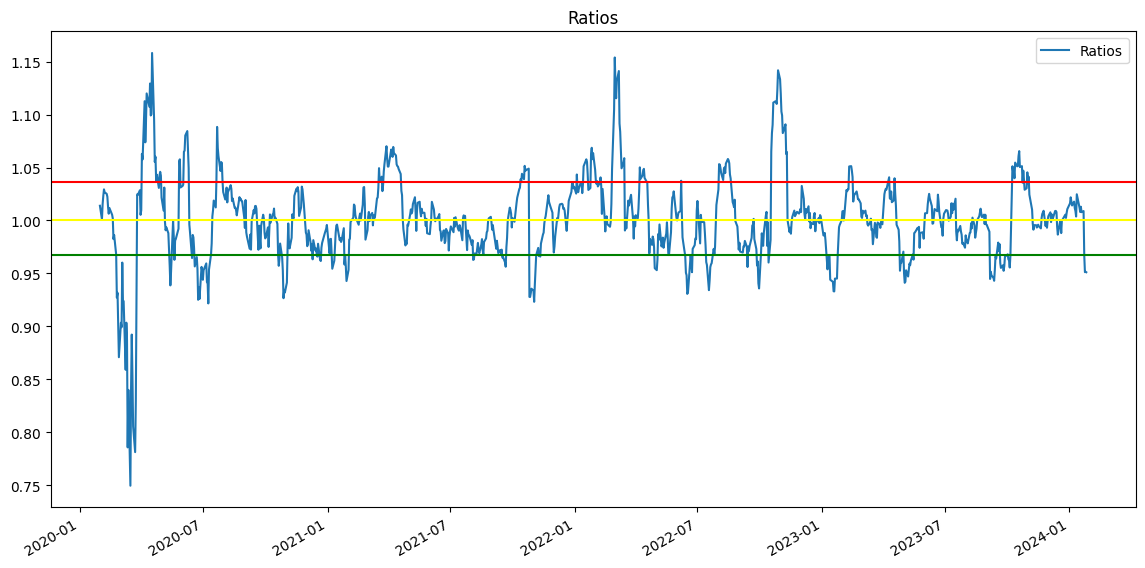

In [16]:
# We use the percentiles do determine when to buy or sell the asset
#We first plot the ratios
plt.figure(figsize=(14,7))
plt.title('Ratios')
df['Ratios'].dropna().plot(legend= True)
plt.axhline(percentile_values[0],c='green', label='15 th percentile')
plt.axhline(percentile_values[2],c='yellow', label='50 th percentile')
plt.axhline(percentile_values[-1],c='red', label='85 th percentile')

# Creating a Buy and Sell signal 
#### Rule : 
### 1: We shall place -1 where the ratios is greater than the precentile for selling and NAN otherwise
### 2: We shall place 1 where the ratios is less than the precentile for buying put the current value otherwise
### 3 : Applying ffill to fill any missing value in the data frame

In [20]:

sell=percentile_values[-1] # we wnat to sell when greater than 85th percentile threshold
buy=percentile_values[0] # 15th percentile and below we want to buy
df['Positions']=np.where(df. Ratios > sell , -1,np.nan)
df['Positions']=np.where(df. Ratios < buy,1,df['Positions'])
df['Positions']=df['Positions'].ffill()
#Now getting the Buy and Sell signals
df['Buy']=np.where(df.Positions ==1,df['Close'],np.nan)
df['Sell']=np.where(df.Positions ==-1, df['Close'],np.nan)


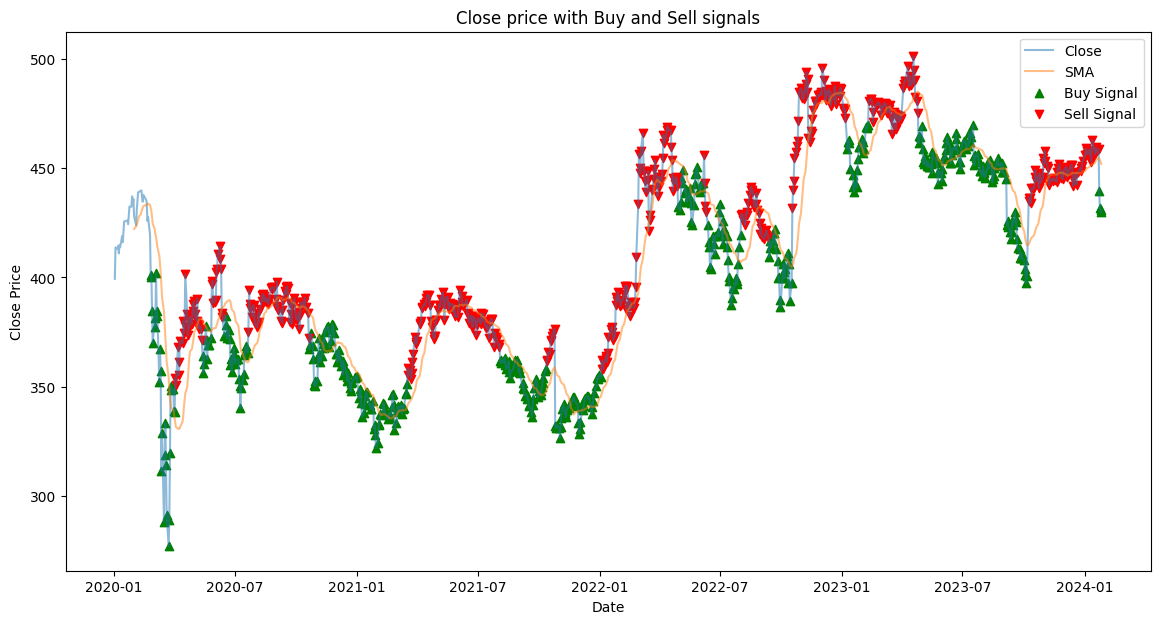

In [23]:
#Visualize the buy and sell signals and close price 
plt.figure(figsize=(14,7))
plt.title('Close price with Buy and Sell signals')
plt.plot(df['Close'],alpha=0.5,label='Close')
plt.plot(df['SMA'],alpha=0.5,label='SMA')
plt.scatter(df.index,df['Buy'],color='green',label='Buy Signal',marker='^',alpha=1)
plt.scatter(df.index,df['Sell'],color='red',label='Sell Signal',marker='v',alpha=1)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [24]:
#Checking the profitability of the strategy
df['Strategy_Returns']=df.Positions.shift(1)*df.Log_Returns
df['Strategy_Returns']

2020-01-02         NaN
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08         NaN
                ...   
2024-01-22   -0.002182
2024-01-23    0.042503
2024-01-24   -0.018409
2024-01-25   -0.001414
2024-01-26   -0.002625
Name: Strategy_Returns, Length: 1024, dtype: float64

#  Plot the cummulative Log returns and cummulative mean reversion strategy

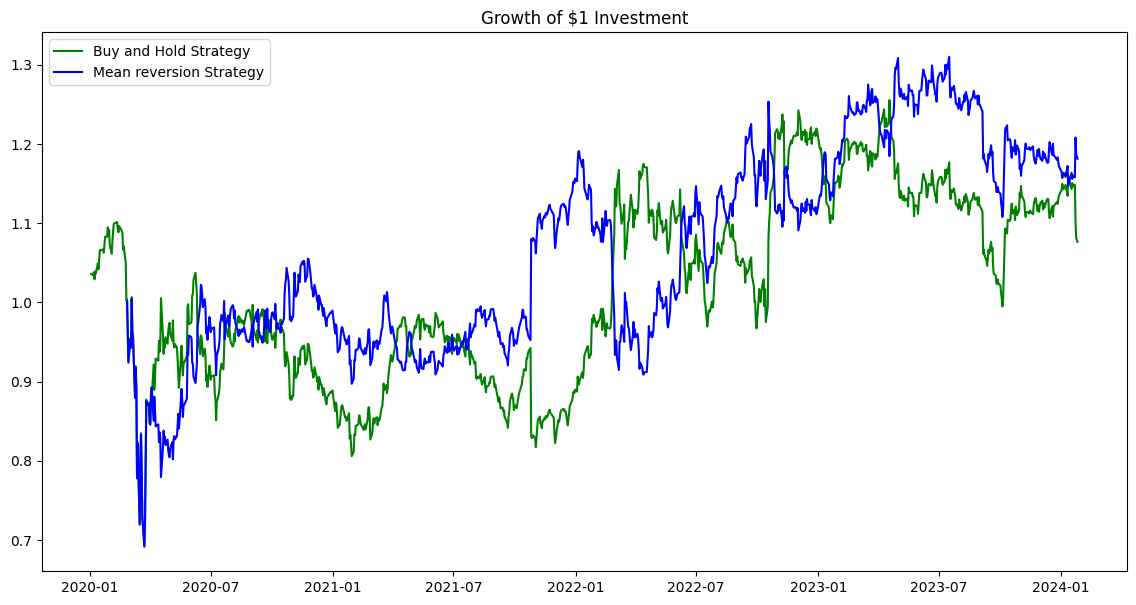

In [25]:

plt.figure(figsize=(14,7))
plt.title('Growth of $1 Investment')
plt.plot(np.exp(df['Log_Returns'].dropna()).cumprod(),c='green',label='Buy and Hold Strategy')
plt.plot(np.exp(df['Strategy_Returns'].dropna()).cumprod(),c='blue',label='Mean reversion Strategy')
plt.legend()

In [27]:
print('Buy and Hold strategy Returns: ',np.exp(df['Log_Returns'].dropna()).cumprod()[-1]-1)
print('Mean reversion strategy Returns: ',np.exp(df['Strategy_Returns'].dropna()).cumprod()[-1]-1)

Buy and Hold strategy Returns:  0.07647046327544005
Mean reversion strategy Returns:  0.1814229346014007


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9424\1528502703.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Buy and Hold strategy Returns: ',np.exp(df['Log_Returns'].dropna()).cumprod()[-1]-1)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9424\1528502703.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Mean reversion strategy Returns: ',np.exp(df['Strategy_Returns'].dropna()).cumprod()[-1]-1)


#### The strategy returns Buy and Hold against Mean reversion